In [78]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, r2_score, mean_squared_error, median_absolute_error
import warnings
warnings.filterwarnings('ignore')

In [79]:
# Membaca data csv
from sklearn.datasets import load_boston
boston = load_boston()

In [80]:
boston.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename', 'data_module'])

In [81]:
print(boston['DESCR'])

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

# Data Wrangling

In [82]:
# Memasukan data boston ke dataframe
df = pd.DataFrame(data = boston['data'], columns = boston['feature_names'])
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [83]:
# Membuat nilai variabel dan kolom baru untuk nilai target 
target = pd.Series(boston['target'])
df['Price'] = target
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [84]:
# Mengecek tipe data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  Price    506 non-null    float64
dtypes: float64(14)
memory usage: 55.5 KB


In [85]:
# Mengecek nilai kosong
df.isna().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
Price      0
dtype: int64

In [86]:
# Melihat nilai statistik
df.describe().T

,count,mean,std,min,25%,50%,75%,max
CRIM,506.0,3.613524,8.601545,0.00632,0.082045,0.25651,3.677083,88.9762
ZN,506.0,11.363636,23.322453,0.00000,0.000000,0.00000,12.500000,100.0000
INDUS,506.0,11.136779,6.860353,0.46000,5.190000,9.69000,18.100000,27.7400
CHAS,506.0,0.069170,0.253994,0.00000,0.000000,0.00000,0.000000,1.0000
NOX,506.0,0.554695,0.115878,0.38500,0.449000,0.53800,0.624000,0.8710
RM,506.0,6.284634,0.702617,3.56100,5.885500,6.20850,6.623500,8.7800
AGE,506.0,68.574901,28.148861,2.90000,45.025000,77.50000,94.075000,100.0000
DIS,506.0,3.795043,2.105710,1.12960,2.100175,3.20745,5.188425,12.1265
RAD,506.0,9.549407,8.707259,1.00000,4.000000,5.00000,24.000000,24.0000
TAX,506.0,408.237154,168.537116,187.00000,279.000000,330.00000,666.000000,711.0000


In [87]:
bsDesc = []

for i in df.columns:
    bsDesc.append([
        i,
        df[i].dtypes,
        df[i].isna().sum(),
        round((df[i].isna().sum() / len(df)) * 100, 2),
        df[i].nunique(),
        df[i].drop_duplicates().sample(2).values
    ])

In [88]:
pd.DataFrame(data = bsDesc,
            columns=[
                'Features',
                'DataType',
                'Null',
                'NullPercentage',
                'Unique',
                'UniqueSample'
            ])

,Features,DataType,Null,NullPercentage,Unique,UniqueSample
0,CRIM,float64,0,0.0,504,"[0.03237, 0.03615]"
1,ZN,float64,0,0.0,26,"[30.0, 28.0]"
2,INDUS,float64,0,0.0,76,"[13.92, 1.91]"
3,CHAS,float64,0,0.0,2,"[0.0, 1.0]"
4,NOX,float64,0,0.0,81,"[0.403, 0.597]"
5,RM,float64,0,0.0,446,"[5.52, 6.482]"
6,AGE,float64,0,0.0,356,"[40.3, 97.7]"
7,DIS,float64,0,0.0,412,"[4.0952, 1.8956]"
8,RAD,float64,0,0.0,9,"[4.0, 7.0]"
9,TAX,float64,0,0.0,66,"[345.0, 233.0]"


- Cek Outlier

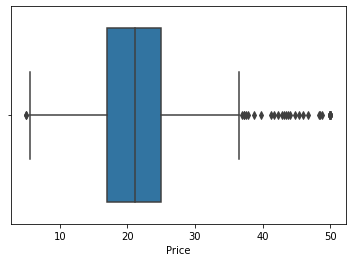

In [89]:
sns.boxplot(df['Price'])
plt.show()

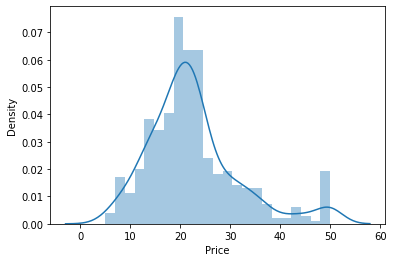

In [90]:
sns.distplot(df['Price'])
plt.show()

- Dari grafik di atas terdapat outlier yang menyebabkan data tidak berdistribusi normal. Jika dilihat outliernya berapa pada price 30 sampai dengan price 50. 

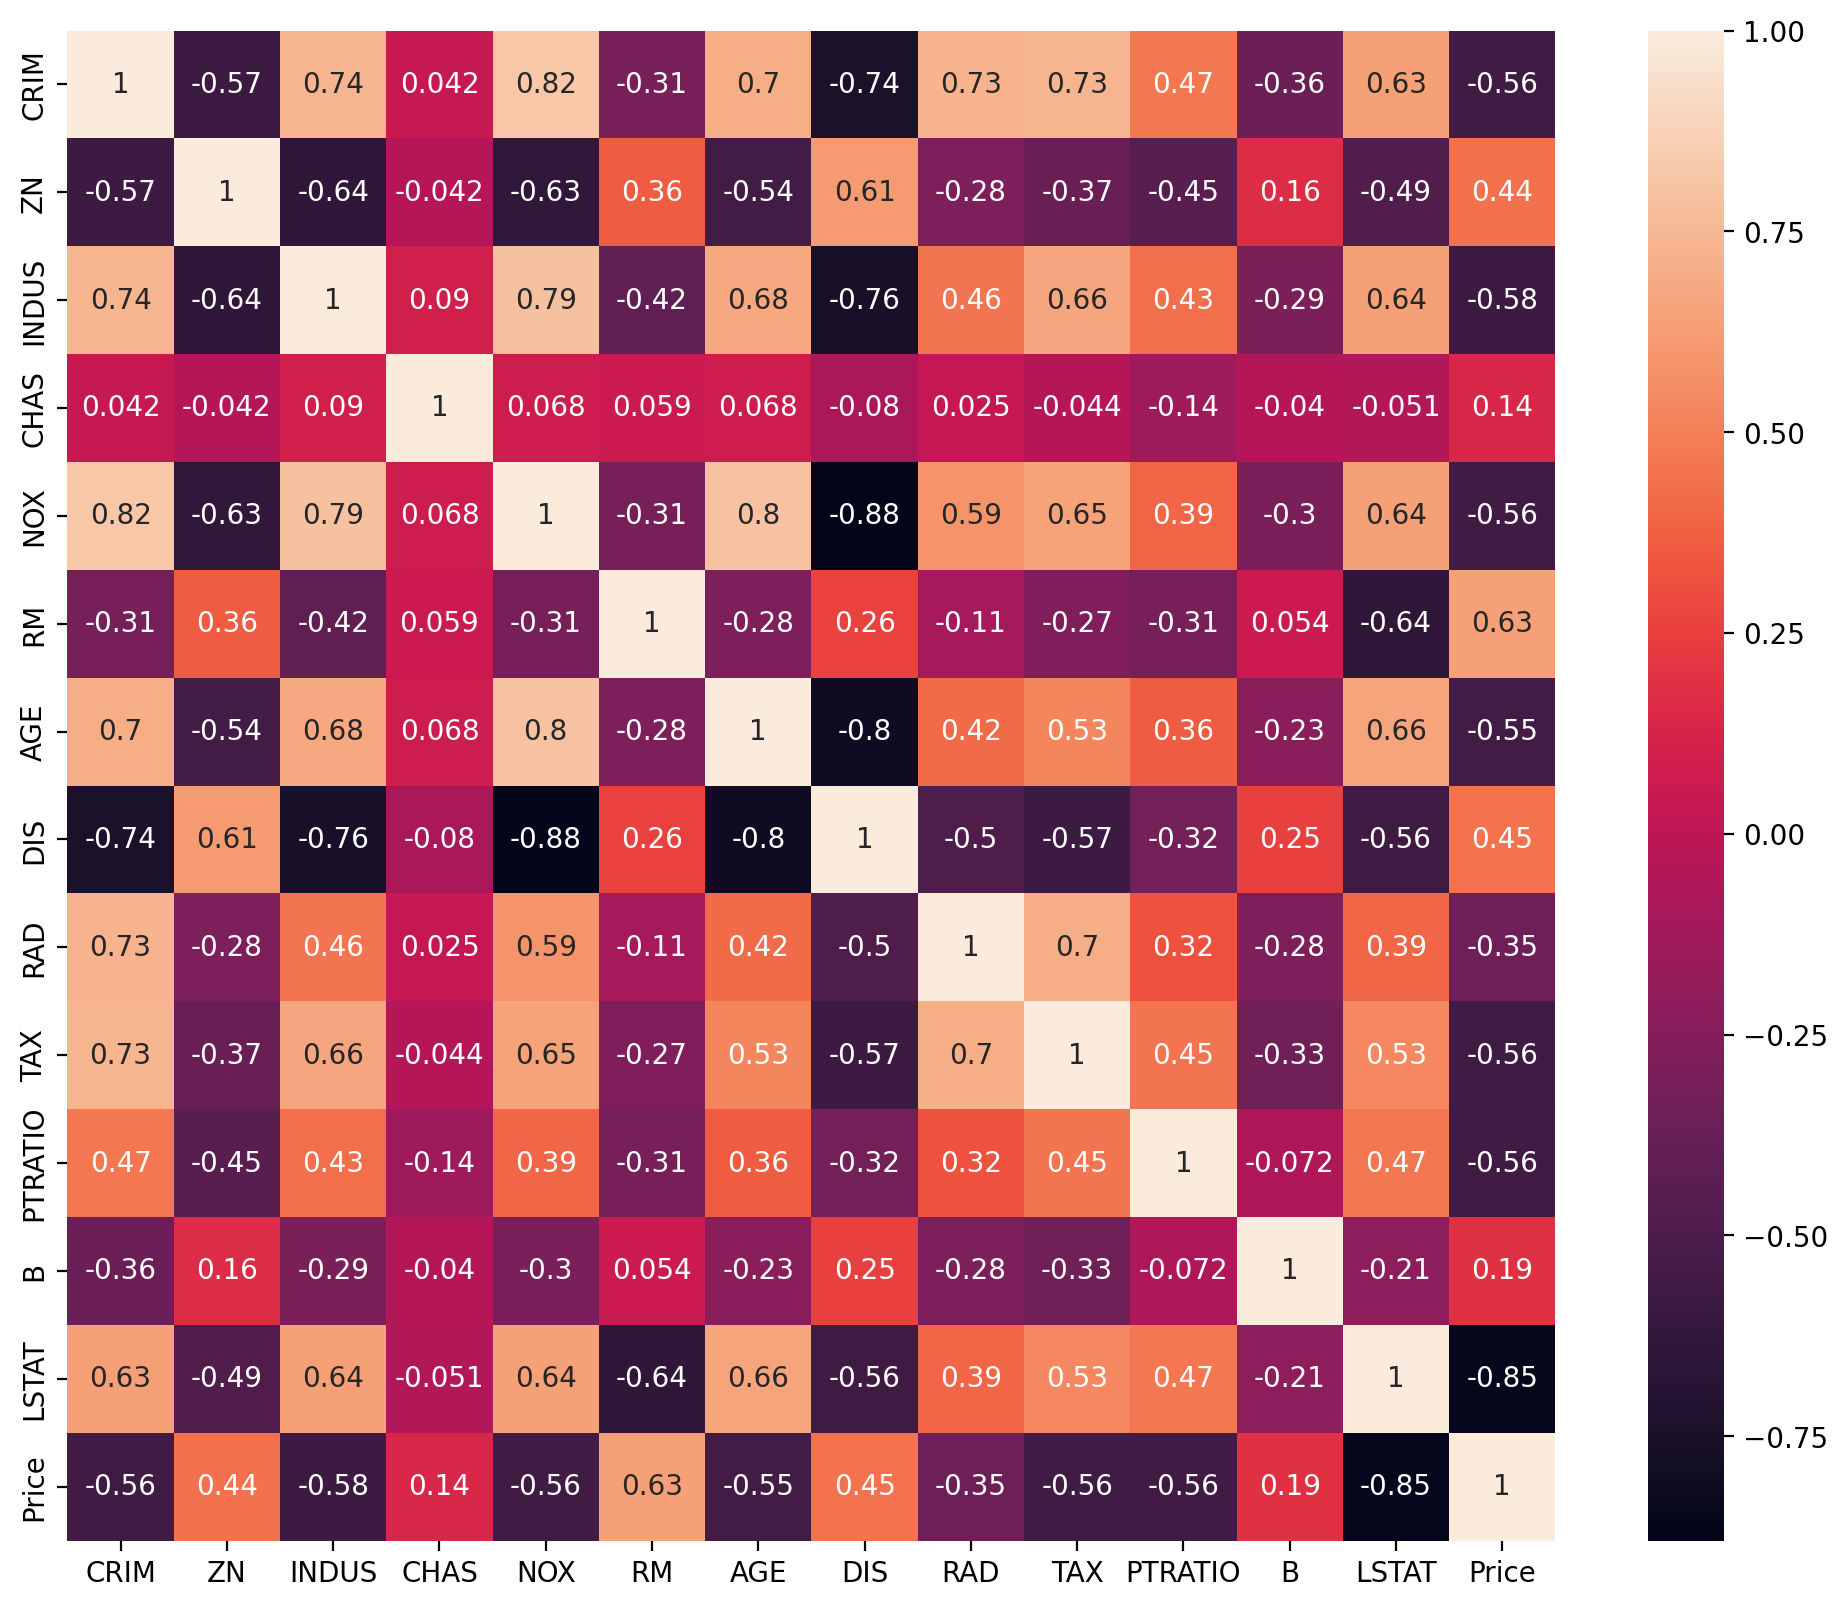

In [91]:
# Melihat korelasi
plt.figure(figsize=(12,10),dpi=200)
sns.heatmap(df.corr('spearman'), annot=True)
plt.show()

Dari data di atas terdapat dapat dilihat nilai yang memiliki korelasi positif namun berada di bawah 0.5 ada di kolom ZN,CHAS,DIS,B dan kolom ini akan di hapus. Selanjutnya dapat dilihat kolom yang memiliki korelasi negatif berapa di bawah -0.5 ada di kolom RAD sehingga kolom ini akan di hapus. Penghapus kolom berguna sebagai feature selection.

In [92]:
# Penghapus kolom
df.drop(columns=['ZN', 'CHAS', 'DIS', 'RAD', 'B'], inplace=True)

# MACHINE LEARNING

### 1. Splitting Dataset

In [93]:
# Features / Soal
X = df.drop(columns='Price')

# Target / Jawaban
y = df['Price']

In [94]:
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size= .15, random_state=42)

### 2. Modelling (Regresi Linear)

In [95]:
# Membuat model
Model = LinearRegression(fit_intercept=True)

In [96]:
# Membuat pattern dari soal latihan ke jawaban latihan
Model.fit(X_train,y_train)

LinearRegression()

In [97]:
# Melihat score antara soal ujian dengan jawaban ujian
Model.score(X_train,y_train)

0.673312668221781

In [98]:
# Melihat intercept
Model.intercept_

20.924486266057222

In [99]:
# Melihat coef
Model.coef_

array([-7.45742987e-02,  6.22184157e-02, -8.00488739e+00,  4.35949056e+00,
        3.90064256e-02,  6.73181212e-04, -9.25250046e-01, -6.04583418e-01])

In [100]:
# Membuat sebuah tabel untuk coefien soal latihan
X_train.columns
pd.DataFrame(data = Model.coef_, index = X_train.columns, columns=['Coef'])

,Coef
CRIM,-0.074574
INDUS,0.062218
NOX,-8.004887
RM,4.359491
AGE,0.039006
TAX,0.000673
PTRATIO,-0.925250
LSTAT,-0.604583


In [101]:
X_train.head()

,CRIM,INDUS,NOX,RM,AGE,TAX,PTRATIO,LSTAT
104,0.13960,8.56,0.5200,6.167,90.0,384.0,20.9,12.33
203,0.03510,2.68,0.4161,7.853,33.2,224.0,14.7,3.81
381,15.87440,18.10,0.6710,6.545,99.1,666.0,20.2,21.08
489,0.18337,27.74,0.6090,5.414,98.3,711.0,20.1,23.97
69,0.12816,6.07,0.4090,5.885,33.0,345.0,18.9,8.79


### 3. Memprediksi

- Prediksi Training

In [102]:
Model.predict([[0.02, 21.56, 0.75, 7.56, 21, 100, 18.02, 10.75]])

array([26.93268241])

In [103]:
# prediksi train
pred_train = Model.predict(X_train) 

In [104]:
# Menggabungkan variabel soal dan jawaban
Training_set = pd.concat([X_train, y_train], axis=1)

In [105]:
# Membuat kolom baru dari hasil prediksi
Training_set['Price_pred_train'] = pred_train

In [106]:
# Membuat kolom baru dari hasil selisih prediksi dengan nilai kolom price 
Training_set['Error_train'] = abs(Training_set['Price'] - Training_set['Price_pred_train'])

In [107]:
Training_set

,CRIM,INDUS,NOX,RM,AGE,TAX,PTRATIO,LSTAT,Price,Price_pred_train,Error_train
104,0.13960,8.56,0.5200,6.167,90.0,384.0,20.9,12.33,20.1,21.145943,1.045943
203,0.03510,2.68,0.4161,7.853,33.2,224.0,14.7,3.81,48.5,37.534027,10.965973
381,15.87440,18.10,0.6710,6.545,99.1,666.0,20.2,21.08,10.9,16.907610,6.007610
489,0.18337,27.74,0.6090,5.414,98.3,711.0,20.1,23.97,7.0,12.587629,5.587629
69,0.12816,6.07,0.4090,5.885,33.0,345.0,18.9,8.79,20.9,22.392143,1.492143
...,...,...,...,...,...,...,...,...,...,...,...
106,0.17120,8.56,0.5200,5.836,91.9,384.0,20.9,18.66,19.5,15.947694,3.552306
270,0.29916,6.96,0.4640,5.856,42.1,223.0,18.6,13.00,21.1,19.873180,1.226820
348,0.01501,2.01,0.4350,6.635,29.7,280.0,17.0,5.99,24.5,28.487796,3.987796
435,11.16040,18.10,0.7400,6.629,94.6,666.0,20.2,23.27,13.4,15.573446,2.173446


- Prediksi Testing

Dari hasil prediksi di atas terdapat price dengan hasil predict laltihan terbaru ada di 26

In [108]:
# Prediksi test
pred_test = Model.predict(X_test)

In [109]:
# Menggabungkan variabel soal dan jawaban
Testing_set = pd.concat([X_test, y_test], axis=1)

In [110]:
# Membuat kolom baru dari hasil prediksi
Testing_set['Price_pred'] = pred_test

In [111]:
# Membuat kolom baru dari hasil selisih prediksi dengan nilai kolom price 
Testing_set['Error'] = abs(Testing_set['Price'] - Testing_set['Price_pred'])

In [112]:
Testing_set

,CRIM,INDUS,NOX,RM,AGE,TAX,PTRATIO,LSTAT,Price,Price_pred,Error
173,0.09178,4.05,0.510,6.416,84.1,296.0,16.6,9.04,23.6,27.712742,4.112742
274,0.05644,6.41,0.447,6.758,32.9,254.0,17.6,3.53,32.4,30.238069,2.161931
491,0.10574,27.74,0.609,5.983,98.8,711.0,20.1,18.07,13.6,18.660514,5.060514
72,0.09164,10.81,0.413,6.065,7.8,305.0,19.2,5.52,22.8,24.131994,1.331994
452,5.09017,18.10,0.713,6.297,91.8,666.0,20.2,17.27,16.1,18.313193,2.213193
...,...,...,...,...,...,...,...,...,...,...,...
481,5.70818,18.10,0.532,6.750,74.9,666.0,20.2,7.74,23.7,26.793311,3.093311
444,12.80230,18.10,0.740,5.854,96.6,666.0,20.2,23.79,10.8,11.836027,1.036027
355,0.10659,1.91,0.413,5.936,19.5,334.0,22.0,5.57,20.6,20.869729,0.269729
77,0.08707,12.83,0.437,6.140,45.8,398.0,18.7,10.27,20.8,23.528564,2.728564


# 4. Mengukur Skore Evaluasi Matrix

- Training

In [113]:
r2_train = r2_score(y_train, pred_train)
print(f'Skore dari evaluasi matrix R2 adalah {r2_train}')

Skore dari evaluasi matrix R2 adalah 0.673312668221781


In [114]:
MAE_train = mean_absolute_error(y_train, pred_train)
print(f'Skore dari evaluasi matrix MAE adalah {MAE_train}')

Skore dari evaluasi matrix MAE adalah 3.766914642244403


In [115]:
MSE_train = mean_absolute_error(y_train, pred_train)
print(f'Skore dari evaluasi matrix MSE adalah {MSE_train}')

Skore dari evaluasi matrix MSE adalah 3.766914642244403


In [116]:
RMSE_train = np.sqrt(MSE_train)
print(f'Skore dari evaluasi matrix RMSE adalah {RMSE_train}')

Skore dari evaluasi matrix RMSE adalah 1.9408541012256442


- Testing
  

In [117]:
r2_test = r2_score(y_test, pred_test)
print(f'Skore dari evaluasi matrix R2 adalah {r2_test}')

Skore dari evaluasi matrix R2 adalah 0.7714453755347113


In [118]:
MAE_test = mean_absolute_error(y_test, pred_test)
print(f'Skore dari evaluasi matrix MAE adalah {MAE_test}')

Skore dari evaluasi matrix MAE adalah 2.816035479405276


In [119]:
MSE_test = mean_squared_error(y_test, pred_test)
print(f'Skore dari evaluasi matrix MSE adalah {MSE_test}')

Skore dari evaluasi matrix MSE adalah 14.92548751112529


In [120]:
RMSE_test = np.sqrt(MSE_test)
print(f'Skore dari evaluasi matrix RMSE adalah {RMSE_test}')

Skore dari evaluasi matrix RMSE adalah 3.8633518492528336


In [121]:
data = {
    "Training" : [r2_train, MAE_train, MSE_train, RMSE_train],
    "Testing" : [r2_test, MAE_test, MSE_test, RMSE_test]
}

In [122]:
pd.DataFrame(data, index=["R Squared", "MAE", "MSE", "RMSE"])

,Training,Testing
R Squared,0.673313,0.771445
MAE,3.766915,2.816035
MSE,3.766915,14.925488
RMSE,1.940854,3.863352
